<a href="https://colab.research.google.com/github/nubialmeida/projeto-pandas/blob/main/Cenipa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas

In [20]:
pip install pandera pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.1/492.1 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 KB 30.3 MB/s eta 0:00:00


In [2]:

pip install gcsfs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.6 MB/s eta 0:00:00


##Instalação de bibliotecas

In [21]:
import pandas as pd
import numpy as np
import os
from google.cloud import storage
import pandera as pa
import pymongo
from pymongo import MongoClient

##Conector MongoDB Atlas

In [115]:
uri = "mongodb+srv://cluster0.pvxzqua.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/drive/MyDrive/MongoDb/X509-cert-342951600753315466.pem')

db = client['Brutos']
colecao = db['Cenipa']

In [120]:
#Selecionando a base e coleção
db = client['Projeto_Cenipa']
colecaoAirBnb = db['brutos']
colecaoAirBnb.count_documents({})


6769

In [119]:

#Enviando de um dataframe para coleção no MONGO
df_dict = df.to_dict("records")

colecaoAirBnb.insert_many(df_dict)

##Conector para Cloud Storage(bucket)

In [6]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto) conector

serviceAccount = '/content/drive/MyDrive/chave/colab.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [7]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('nubialmeida45')
bucket.blob('ocorrencias.csv')
path = 'gs://nubialmeida45/brutos/ocorrencias.csv'

##Extração dos dados(Extract)

In [129]:
df = pd.read_csv(path,sep=';',encoding='ISO-8859-1',parse_dates=['ocorrencia_dia'], dayfirst=True)

##Pré Análise

In [149]:
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,total_recomendacoes,n_aeronaves,saida_pista,periodo
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,0,1,SIM,2022-10-09 16:30:00
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,0,1,NÃO,2022-10-09 16:20:00
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,0,1,SIM,2022-10-06 15:30:00
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,0,1,NÃO,2022-10-06 00:44:00
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,0,1,NÃO,2022-10-05 20:56:00
...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,0,1,NÃO,2010-01-05 19:25:00
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,0,1,NÃO,2010-01-04 17:30:00
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,0,1,NÃO,2010-01-03 12:00:00
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,0,1,NÃO,2010-01-03 11:05:00


In [71]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
periodo                datetime64[ns]
dtype: object

##Tranformações (Limpeza, conversão , etc)

In [56]:
#Backup local(M.RAM) do df
dfback = df.copy()

In [131]:
#Renomeando colunas
df.rename(columns={'ocorrencia_classificacao':'classificacao','ocorrencia_cidade':'cidade','ocorrencia_uf':'uf','ocorrencia_pais':'pais'},inplace=True)
df.rename(columns={'ocorrencia_aerodromo':'aerodromo','ocorrencia_dia':'data','ocorrencia_hora':'horario','total_aeronaves_envolvidas':'n_aeronaves','ocorrencia_saida_pista':'saida_pista'},inplace=True)

In [132]:
#Converter coluna data para string
df['data'] = df['data'].astype(str)

In [133]:
#Criar coluna periodo (data + horario)
df['periodo'] = pd.to_datetime(df['data']+' '+df['horario'])

In [134]:
# Drop de colunas identicas ( codigo_ocorrencia1 , codigo_ocorrencia2,codigo_ocorrencia3 , codigo_ocorrencia4)
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'],axis=1,inplace=True)
# Drop de colunas com problemas e/ou não utilizadas na análise
df.drop(['ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao'],axis=1,inplace=True)

In [135]:
df.drop(['data','horario'],axis=1,inplace=True)# Drop de colunas com problemas e/ou não utilizadas na análise

In [136]:
df.head(3)

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,total_recomendacoes,n_aeronaves,saida_pista,periodo
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,0,1,SIM,2022-10-09 16:30:00
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,0,1,NÃO,2022-10-09 16:20:00
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,0,1,SIM,2022-10-06 15:30:00


In [43]:
df.dtypes#Verificando o tipos das colunas

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
periodo                datetime64[ns]
dtype: object

In [63]:
#Visualiza valores unicos na coluna, verifica-se que contém '***', '**NI'
pd.unique(df['aerodromo'])

array(['SBSP', 'SBVT', 'SDAI', 'SBBH', 'SBEG', '***', '**NI', 'SBNV',
       'SBUL', 'SBAU', 'SBBP', 'SBTE', 'SBGR', 'SBMT', 'SBCT', 'SBCF',
       'SIEK', 'SBRJ', 'SDLP', 'SWPD', 'SBMA', 'SNYP', 'SNHH', 'SBJF',
       'SBCY', 'SBPS', 'SBMK', 'SBNF', 'SBTF', 'SSMK', 'SNAX', 'SBKP',
       'SBFZ', 'SNPA', 'SBIZ', 'SNFX', 'SDRK', 'SBRF', 'SSBN', 'SBPR',
       'SBSJ', 'SBST', 'SBGO', 'SDCO', 'SBSV', 'SBPJ', 'SBGL', 'SBRD',
       'SBBE', 'SBCH', 'SBLO', 'SBPL', 'SWGW', 'SWLB', 'SBBU', 'SBMQ',
       'SIPO', 'SIAN', 'SBJV', 'SNDC', 'SBBI', 'SBSC', 'SSKG', 'SBBR',
       'SSBG', 'SBIL', 'SBPO', 'SDAM', 'SSOG', 'SBPV', 'SBSR', 'SBBV',
       'SBSN', 'SBFI', 'SDFD', 'SJEH', 'SBSI', 'SWFN', 'SDIG', 'SNHS',
       'SBJP', 'SBPA', 'SBJA', 'SBJR', 'SBRP', 'SISN', 'SBMO', 'SNRU',
       'SNQV', 'SNCP', 'SDIH', 'SBTG', 'SIVU', 'SWMV', 'SIRI', 'SNIT',
       'SBRB', 'SSPI', 'SWCA', 'SBJI', 'SBFL', 'SDRC', 'SNMH', 'SNBS',
       'SWLW', 'SSOT', 'SNPO', 'SBCG', 'SBJD', 'SDEN', 'APUA', 'SDAG',
       

In [137]:
df.replace(['***','**NI'],pd.NA,inplace=True) #Trocando '***','**NI' POR NA(nulos)

In [138]:
df.replace(pd.NA,np.NaN,inplace=True)#Trocando NA POR NAN(nulos)

In [139]:
#Visualiza valores unicos na coluna, verifica-se que contém nan no lugar de: '***', '**NI'
pd.unique(df['aerodromo'])

array(['SBSP', 'SBVT', 'SDAI', 'SBBH', 'SBEG', nan, 'SBNV', 'SBUL',
       'SBAU', 'SBBP', 'SBTE', 'SBGR', 'SBMT', 'SBCT', 'SBCF', 'SIEK',
       'SBRJ', 'SDLP', 'SWPD', 'SBMA', 'SNYP', 'SNHH', 'SBJF', 'SBCY',
       'SBPS', 'SBMK', 'SBNF', 'SBTF', 'SSMK', 'SNAX', 'SBKP', 'SBFZ',
       'SNPA', 'SBIZ', 'SNFX', 'SDRK', 'SBRF', 'SSBN', 'SBPR', 'SBSJ',
       'SBST', 'SBGO', 'SDCO', 'SBSV', 'SBPJ', 'SBGL', 'SBRD', 'SBBE',
       'SBCH', 'SBLO', 'SBPL', 'SWGW', 'SWLB', 'SBBU', 'SBMQ', 'SIPO',
       'SIAN', 'SBJV', 'SNDC', 'SBBI', 'SBSC', 'SSKG', 'SBBR', 'SSBG',
       'SBIL', 'SBPO', 'SDAM', 'SSOG', 'SBPV', 'SBSR', 'SBBV', 'SBSN',
       'SBFI', 'SDFD', 'SJEH', 'SBSI', 'SWFN', 'SDIG', 'SNHS', 'SBJP',
       'SBPA', 'SBJA', 'SBJR', 'SBRP', 'SISN', 'SBMO', 'SNRU', 'SNQV',
       'SNCP', 'SDIH', 'SBTG', 'SIVU', 'SWMV', 'SIRI', 'SNIT', 'SBRB',
       'SSPI', 'SWCA', 'SBJI', 'SBFL', 'SDRC', 'SNMH', 'SNBS', 'SWLW',
       'SSOT', 'SNPO', 'SBCG', 'SBJD', 'SDEN', 'APUA', 'SDAG', 'SIUD',
       'S

In [49]:
#Verificando dados nulos , ausentes , etc
df.isna().sum()

codigo_ocorrencia         0
classificacao             0
cidade                    0
uf                        4
pais                      0
aerodromo              2618
total_recomendacoes       0
n_aeronaves               0
saida_pista               0
periodo                   2
dtype: int64

In [50]:
df.count()#Verificando se todas as colunas estão preenchidas corretamente

codigo_ocorrencia      6769
classificacao          6769
cidade                 6769
uf                     6765
pais                   6769
aerodromo              4151
total_recomendacoes    6769
n_aeronaves            6769
saida_pista            6769
periodo                6767
dtype: int64

##Busca(query)

In [74]:
filtronulo = df.uf.isna() #Procurando dados que faltaram preencher
df.loc[filtronulo]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,total_recomendacoes,n_aeronaves,saida_pista,periodo
283,80665,ACIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,0,1,NÃO,2022-04-22 20:00:00
320,80631,INCIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,0,1,NÃO,2022-04-04 11:15:00
912,79956,ACIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,0,1,NÃO,2021-02-26 11:00:00
4541,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,NaN,BRASIL,NaN,0,1,NÃO,2013-09-02 02:54:00


In [ ]:
#renomear colunas esse
df.rename(columns={'ocorrencia_classificacao':'classificacao','ocorrencia_cidade':'cidade','ocorrencia_uf':'uf','ocorrencia_pais':'pais'})
df.rename(columns={'ocorrencia_aerodromo':'aerodromo','ocorrencia_dia':'data','ocorrencia_hora':'horario','total_aeronaves_envolvidas':'n_aeronaves','ocorrencia_saida_pista':'saida_pista'},inplace=True)

In [ ]:
#printa todos os valores unicos dentro
sorted(pd.unique(df['aerodromo']))

In [ ]:
#Converter coluna data para string
df['data'] = df['data'].astype(str)

In [44]:
#ordena a coluna desse jeito
df2 = df[['codigo_ocorrencia','uf','classificacao']]

In [73]:
#verifica quais são as linhas que estão preenchidos
df.count

<bound method DataFrame.count of       codigo_ocorrencia    classificacao              cidade  uf    pais  \
0                 81027  INCIDENTE GRAVE           SÃO PAULO  SP  BRASIL   
1                 81030        INCIDENTE             VITÓRIA  ES  BRASIL   
2                 81023  INCIDENTE GRAVE           AMERICANA  SP  BRASIL   
3                 81029        INCIDENTE      BELO HORIZONTE  MG  BRASIL   
4                 81025        INCIDENTE              MANAUS  AM  BRASIL   
...                 ...              ...                 ...  ..     ...   
6764              40324        INCIDENTE             PELOTAS  RS  BRASIL   
6765              39527         ACIDENTE  LUCAS DO RIO VERDE  MT  BRASIL   
6766              40211        INCIDENTE      RIO DE JANEIRO  RJ  BRASIL   
6767              40349        INCIDENTE               BELÉM  PA  BRASIL   
6768              40351        INCIDENTE      RIO DE JANEIRO  RJ  BRASIL   

     aerodromo  total_recomendacoes  n_aeronaves saida

##GroupBy (AGRUPAMENTOS)


<Axes: xlabel='mês', ylabel='número de acidentes'>

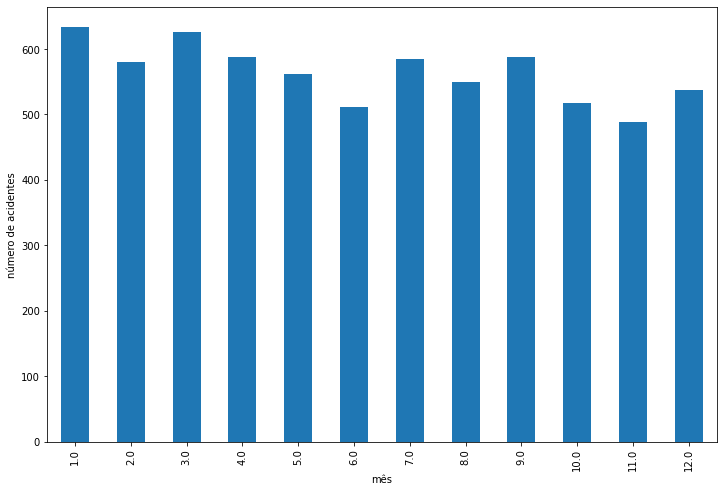

In [105]:
meses = df.periodo.dt.month #Verificando número de acidentes por mês
df.groupby(meses).size().plot.bar(figsize=(12,8),xlabel='mês',ylabel='número de acidentes')

<Axes: xlabel='ano', ylabel='número de acidentes'>

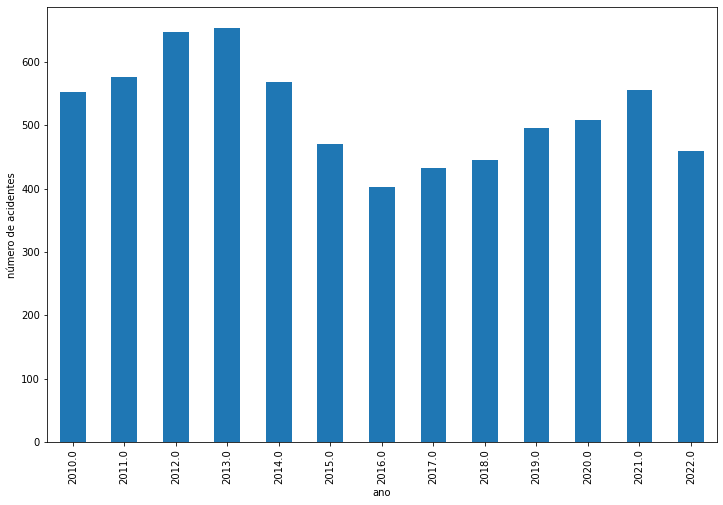

In [106]:
anos = df.periodo.dt.year #Verificando número de acidentes por ano
df.groupby(anos).size().plot.bar(figsize=(12,8),xlabel='ano',ylabel='número de acidentes')

In [76]:
df.groupby(['classificacao']).size().sort_values(ascending=False)  #Verficando quais são os maiores acidentes

classificacao
INCIDENTE          3795
ACIDENTE           2090
INCIDENTE GRAVE     884
dtype: int64

In [84]:
df.groupby(['cidade']).size().sort_values(ascending=False) #Verificando qual a cidade que tem mais acidente

cidade
RIO DE JANEIRO    366
SÃO PAULO         324
BELO HORIZONTE    211
CAMPINAS          209
GUARULHOS         183
                 ... 
CRATEÚS             1
NOVA ODESSA         1
COXIM               1
NOVA PONTE          1
CARLOS CHAGAS       1
Length: 1195, dtype: int64

In [86]:
df.groupby(['uf']).size().sort_values(ascending=False) #Verificando quais estados que tiveram mais acidentes

uf
SP    1625
MG     638
RJ     578
PR     548
RS     395
GO     359
MT     359
PA     344
AM     279
BA     253
SC     223
MS     191
DF     156
PE     126
CE      95
ES      91
MA      86
RR      73
AC      66
TO      60
RO      54
PI      45
AL      34
PB      28
RN      22
SE      22
AP      15
dtype: int64

In [81]:
df.groupby(['aerodromo'],dropna=False).size().sort_values(ascending=False) #Verificando as ocorrências por aerodrómo

aerodromo
NaN     2618
SBGR     173
SBMT     150
SBKP     128
SBBH     124
        ... 
SJVL       1
SJTO       1
SJOD       1
SJNQ       1
SJNC       1
Length: 574, dtype: int64

##Plotagem

<Axes: xlabel='classificação', ylabel='número de acidentes'>

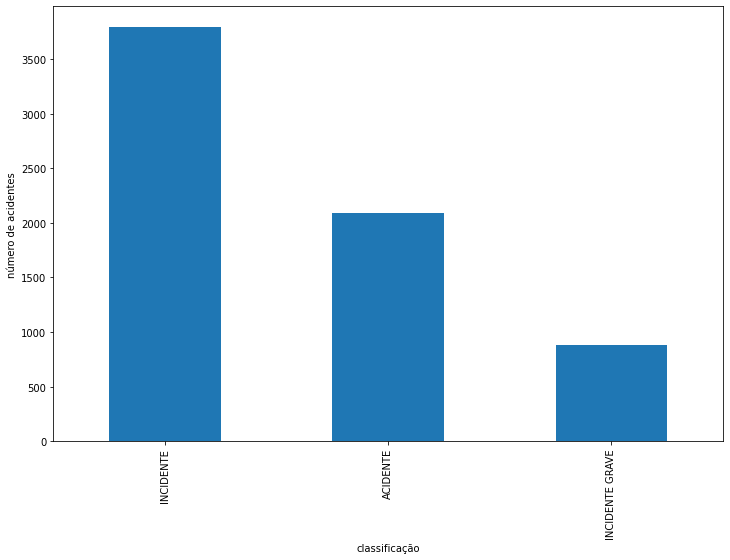

In [79]:
df.groupby(['classificacao'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='classificação',ylabel='número de acidentes')
#Colocando graficamente quais são os números de acidentes pela classificação

<Axes: xlabel='número de aeronaves', ylabel='acidentes'>

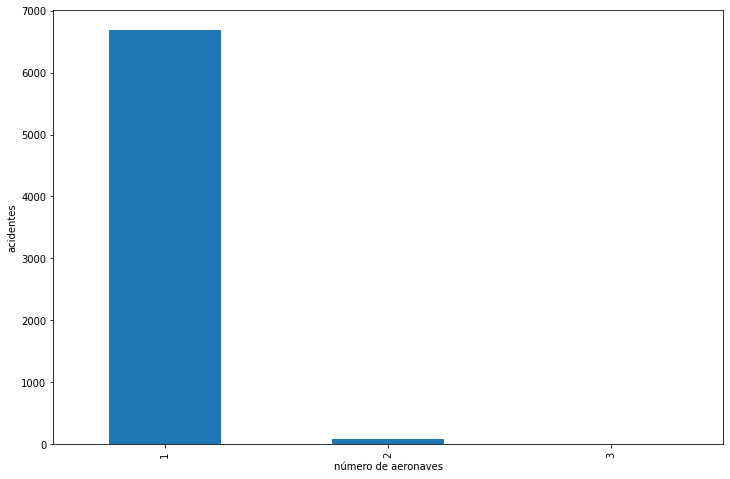

In [80]:
df.groupby(['n_aeronaves'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='número de aeronaves',ylabel='acidentes')
#Colocando graficamente quais são os números de aeronaves por acidentes

##Criação do Schema de validação de dados

In [155]:
#Criação do schema pandera

schema = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'pais':pa.Column(pa.String),
        'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
        'data':pa.Column(pa.DateTime),
        'horario':pa.Column(pa.String,pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3)),
    }
)

schema2 = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'pais':pa.Column(pa.String),
        'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3)),
        'periodo':pa.Column(pa.DateTime,nullable=True),
    }
)

In [156]:
schema2.validate(df)

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,total_recomendacoes,n_aeronaves,saida_pista,periodo
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,0,1,SIM,2022-10-09 16:30:00
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,0,1,NÃO,2022-10-09 16:20:00
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,0,1,SIM,2022-10-06 15:30:00
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,0,1,NÃO,2022-10-06 00:44:00
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,0,1,NÃO,2022-10-05 20:56:00
...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,0,1,NÃO,2010-01-05 19:25:00
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,0,1,NÃO,2010-01-04 17:30:00
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,0,1,NÃO,2010-01-03 12:00:00
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,0,1,NÃO,2010-01-03 11:05:00


##LOAD (Carregamento) salvar o df

In [108]:
#Carregar direto no bucket
df.to_csv('gs://nubialmeida45/tratados/cenipa_tratado.csv',index=False) 

In [157]:
#Conectando MongoDB Atlas
uri = "mongodb+srv://cluster0.pvxzqua.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/drive/MyDrive/MongoDb/X509-cert-342951600753315466.pem')

db = client['Tratados']
colecao = db['Cenipa']

In [158]:

#Selecionando a base e coleção
db = client['Projeto_Cenipa']
colecaoCenipa = db['tratado']
colecaoCenipa.count_documents({})

0

In [ ]:
#Enviando de um dataframe para coleção no MONGO
df_dict = df.to_dict("records")
colecaoCenipa.insert_many(df_dict) #Analisar de como enviar pra o MongoDB

##Considerações finais


##**Através da análise dos dados desse dataframe, percebi que:**


*   Não foi salvo dois periodos de data, horário e algumas cidades não foram identificadas,  podendo ter sido um esquecimento do funcionário
*   A maioria dos acidentes ocorrem por desleixo por parte do funcionário
*   A maioria dos acidentes ocorrem com apenas uma aeronave
*   A cidade que tem mais acidente é o Rio de Janeiro
*   O estado que tem mais acidente é o São Paulo, sugere-se um investigação a esse estado e cidade
*   Durante o periodo de virada de ano e no começo de cada semestre, verifica-se um aumento dos acidentes, podendo ser explicado pelo maior demanda de números de vôos
*   Em 2011, a CENIPA iniciou ações para reduzir os riscos e aumentar a segurança dos vôos, sendo os efeitos perceptíveis apenas em 2014
*   Em 2014, diminuiu os acidentes,uma possível explicação para isso pode ser os altos investimentos para copa do Brasil
*   Havia uma tendência de aumento de acidentes a partir de 2016 a 2019, porém com a restrição de vôos causado pela a pandemia em 2020, essa tendência se estagnou










